In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import path, os, random, math
from pathlib import Path

from Source import SENet

from sklearn.preprocessing import LabelBinarizer




/Users/nhat/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/nhat/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Define paths:
d = Path().resolve()
data_path = str(d) + "/Data"
train_path = data_path + "/train.csv"
predictions_path = "/output/"
sample_path = data_path + "/sample_submission.csv"
weight_save_path = str(d) + "/weights/model_se.ckpt"
weight_load_path = weight_save_path




In [3]:
# Prepare data:
df_train = pd.read_csv(data_path + "/emnist-letters-train.csv")
df_test = pd.read_csv(data_path + "/emnist-letters-test.csv")

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)




In [4]:
# One-hot encode the y-values:
lb = LabelBinarizer()
lb.fit(y_train)
y_train_enc = lb.transform(y_train)
y_test_enc = lb.transform(y_test)

Training Characters Classifier for 15 epochs
Iteration 0: with minibatch training loss = 3.66 and accuracy of 0.062
Iteration 1: with minibatch training loss = 3.61 and accuracy of 0.078
Iteration 2: with minibatch training loss = 3.8 and accuracy of 0.031
Iteration 3: with minibatch training loss = 3.89 and accuracy of 0.016
Iteration 4: with minibatch training loss = 3.72 and accuracy of 0.047
Iteration 5: with minibatch training loss = 3.58 and accuracy of 0.062
Iteration 6: with minibatch training loss = 3.79 and accuracy of 0.031
Iteration 7: with minibatch training loss = 3.57 and accuracy of 0.14
Iteration 8: with minibatch training loss = 3.41 and accuracy of 0.11
Iteration 9: with minibatch training loss = 3.33 and accuracy of 0.14
Iteration 10: with minibatch training loss = 3.48 and accuracy of 0.094
Iteration 11: with minibatch training loss = 3.26 and accuracy of 0.14
Iteration 12: with minibatch training loss = 3.21 and accuracy of 0.094
Iteration 13: with minibatch train

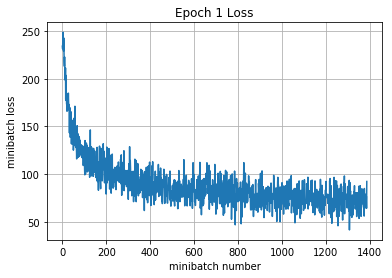

Iteration 1388: with minibatch training loss = 1.06 and accuracy of 0.75
Iteration 1389: with minibatch training loss = 0.948 and accuracy of 0.77
Iteration 1390: with minibatch training loss = 1.1 and accuracy of 0.73
Iteration 1391: with minibatch training loss = 0.923 and accuracy of 0.78
Iteration 1392: with minibatch training loss = 0.956 and accuracy of 0.77
Iteration 1393: with minibatch training loss = 1.01 and accuracy of 0.75
Iteration 1394: with minibatch training loss = 1.14 and accuracy of 0.73
Iteration 1395: with minibatch training loss = 1.08 and accuracy of 0.75
Iteration 1396: with minibatch training loss = 1.18 and accuracy of 0.7
Iteration 1397: with minibatch training loss = 1.04 and accuracy of 0.77
Iteration 1398: with minibatch training loss = 1.06 and accuracy of 0.73
Iteration 1399: with minibatch training loss = 1.13 and accuracy of 0.73
Iteration 1400: with minibatch training loss = 1.09 and accuracy of 0.73
Iteration 1401: with minibatch training loss = 1.3

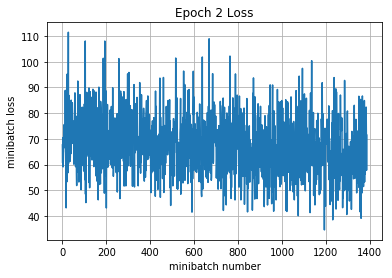

Iteration 2776: with minibatch training loss = 1.19 and accuracy of 0.66
Iteration 2777: with minibatch training loss = 0.891 and accuracy of 0.75
Iteration 2778: with minibatch training loss = 0.979 and accuracy of 0.73
Iteration 2779: with minibatch training loss = 1.15 and accuracy of 0.69
Iteration 2780: with minibatch training loss = 1.15 and accuracy of 0.7
Iteration 2781: with minibatch training loss = 0.874 and accuracy of 0.77
Iteration 2782: with minibatch training loss = 0.81 and accuracy of 0.8
Iteration 2783: with minibatch training loss = 0.716 and accuracy of 0.8
Iteration 2784: with minibatch training loss = 1.15 and accuracy of 0.64
Iteration 2785: with minibatch training loss = 1.11 and accuracy of 0.7
Iteration 2786: with minibatch training loss = 1.08 and accuracy of 0.72
Iteration 2787: with minibatch training loss = 1.08 and accuracy of 0.7
Iteration 2788: with minibatch training loss = 0.802 and accuracy of 0.8
Iteration 2789: with minibatch training loss = 0.954

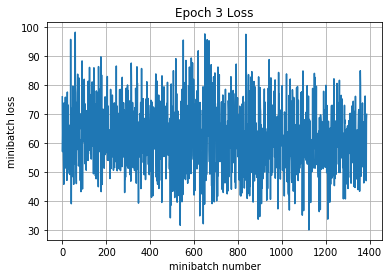

Iteration 4164: with minibatch training loss = 0.895 and accuracy of 0.73
Iteration 4165: with minibatch training loss = 1.15 and accuracy of 0.69
Iteration 4166: with minibatch training loss = 0.746 and accuracy of 0.81
Iteration 4167: with minibatch training loss = 0.982 and accuracy of 0.72
Iteration 4168: with minibatch training loss = 0.74 and accuracy of 0.83
Iteration 4169: with minibatch training loss = 0.981 and accuracy of 0.75
Iteration 4170: with minibatch training loss = 1.02 and accuracy of 0.73
Iteration 4171: with minibatch training loss = 0.794 and accuracy of 0.78
Iteration 4172: with minibatch training loss = 1.04 and accuracy of 0.7
Iteration 4173: with minibatch training loss = 0.884 and accuracy of 0.77
Iteration 4174: with minibatch training loss = 1.08 and accuracy of 0.69
Iteration 4175: with minibatch training loss = 0.761 and accuracy of 0.83
Iteration 4176: with minibatch training loss = 0.915 and accuracy of 0.72
Iteration 4177: with minibatch training loss

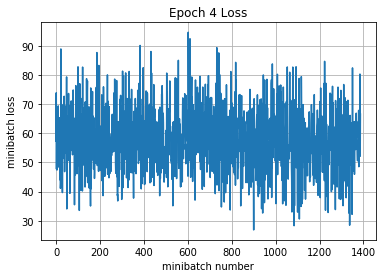

Iteration 5552: with minibatch training loss = 1.13 and accuracy of 0.66
Iteration 5553: with minibatch training loss = 0.939 and accuracy of 0.75
Iteration 5554: with minibatch training loss = 0.85 and accuracy of 0.77
Iteration 5555: with minibatch training loss = 0.905 and accuracy of 0.75
Iteration 5556: with minibatch training loss = 0.784 and accuracy of 0.78
Iteration 5557: with minibatch training loss = 1 and accuracy of 0.73
Iteration 5558: with minibatch training loss = 0.806 and accuracy of 0.8
Iteration 5559: with minibatch training loss = 0.794 and accuracy of 0.77
Iteration 5560: with minibatch training loss = 0.808 and accuracy of 0.78
Iteration 5561: with minibatch training loss = 0.914 and accuracy of 0.72
Iteration 5562: with minibatch training loss = 0.714 and accuracy of 0.8
Iteration 5563: with minibatch training loss = 1.08 and accuracy of 0.72
Iteration 5564: with minibatch training loss = 0.891 and accuracy of 0.75
Iteration 5565: with minibatch training loss = 

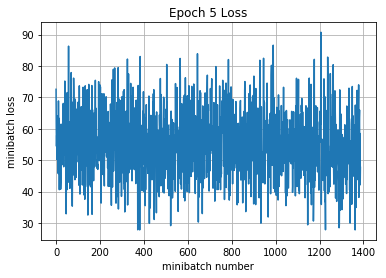

Iteration 6940: with minibatch training loss = 0.769 and accuracy of 0.75
Iteration 6941: with minibatch training loss = 0.929 and accuracy of 0.75
Iteration 6942: with minibatch training loss = 0.687 and accuracy of 0.83
Iteration 6943: with minibatch training loss = 0.675 and accuracy of 0.83
Iteration 6944: with minibatch training loss = 0.978 and accuracy of 0.72
Iteration 6945: with minibatch training loss = 0.796 and accuracy of 0.78
Iteration 6946: with minibatch training loss = 0.703 and accuracy of 0.81
Iteration 6947: with minibatch training loss = 0.806 and accuracy of 0.78
Iteration 6948: with minibatch training loss = 0.78 and accuracy of 0.78
Iteration 6949: with minibatch training loss = 0.815 and accuracy of 0.77
Iteration 6950: with minibatch training loss = 0.867 and accuracy of 0.77
Iteration 6951: with minibatch training loss = 0.618 and accuracy of 0.83
Iteration 6952: with minibatch training loss = 0.662 and accuracy of 0.83
Iteration 6953: with minibatch training

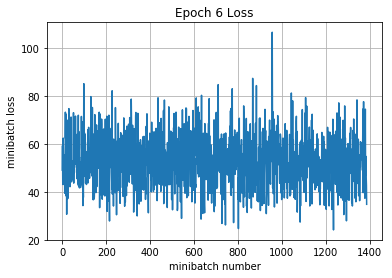

Iteration 8328: with minibatch training loss = 1.01 and accuracy of 0.69
Iteration 8329: with minibatch training loss = 0.779 and accuracy of 0.77
Iteration 8330: with minibatch training loss = 0.828 and accuracy of 0.77
Iteration 8331: with minibatch training loss = 0.982 and accuracy of 0.72
Iteration 8332: with minibatch training loss = 0.703 and accuracy of 0.81
Iteration 8333: with minibatch training loss = 0.764 and accuracy of 0.8
Iteration 8334: with minibatch training loss = 0.968 and accuracy of 0.73
Iteration 8335: with minibatch training loss = 0.657 and accuracy of 0.83
Iteration 8336: with minibatch training loss = 0.697 and accuracy of 0.78
Iteration 8337: with minibatch training loss = 0.731 and accuracy of 0.77
Iteration 8338: with minibatch training loss = 0.815 and accuracy of 0.78
Iteration 8339: with minibatch training loss = 0.569 and accuracy of 0.86
Iteration 8340: with minibatch training loss = 0.833 and accuracy of 0.77
Iteration 8341: with minibatch training 

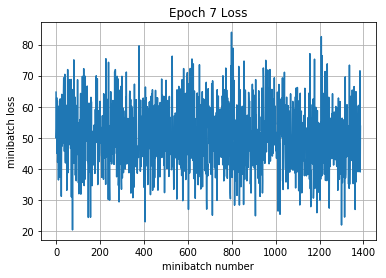

Iteration 9716: with minibatch training loss = 0.695 and accuracy of 0.81
Iteration 9717: with minibatch training loss = 1.13 and accuracy of 0.66
Iteration 9718: with minibatch training loss = 0.578 and accuracy of 0.84
Iteration 9719: with minibatch training loss = 0.872 and accuracy of 0.73
Iteration 9720: with minibatch training loss = 0.777 and accuracy of 0.8
Iteration 9721: with minibatch training loss = 1.03 and accuracy of 0.7
Iteration 9722: with minibatch training loss = 0.726 and accuracy of 0.77
Iteration 9723: with minibatch training loss = 0.896 and accuracy of 0.73
Iteration 9724: with minibatch training loss = 0.624 and accuracy of 0.81
Iteration 9725: with minibatch training loss = 0.823 and accuracy of 0.73
Iteration 9726: with minibatch training loss = 0.693 and accuracy of 0.8
Iteration 9727: with minibatch training loss = 0.983 and accuracy of 0.7
Iteration 9728: with minibatch training loss = 0.736 and accuracy of 0.78
Iteration 9729: with minibatch training loss

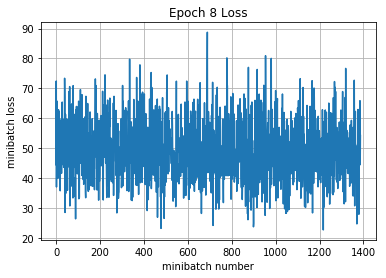

Iteration 11104: with minibatch training loss = 0.863 and accuracy of 0.72
Iteration 11105: with minibatch training loss = 0.69 and accuracy of 0.81
Iteration 11106: with minibatch training loss = 0.757 and accuracy of 0.8
Iteration 11107: with minibatch training loss = 0.845 and accuracy of 0.75
Iteration 11108: with minibatch training loss = 0.493 and accuracy of 0.84
Iteration 11109: with minibatch training loss = 0.589 and accuracy of 0.84
Iteration 11110: with minibatch training loss = 0.652 and accuracy of 0.81
Iteration 11111: with minibatch training loss = 0.661 and accuracy of 0.78
Iteration 11112: with minibatch training loss = 0.762 and accuracy of 0.75
Iteration 11113: with minibatch training loss = 0.583 and accuracy of 0.84
Iteration 11114: with minibatch training loss = 0.987 and accuracy of 0.7
Iteration 11115: with minibatch training loss = 0.476 and accuracy of 0.89
Iteration 11116: with minibatch training loss = 0.749 and accuracy of 0.77
Iteration 11117: with miniba

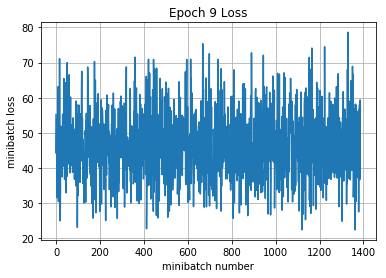

Iteration 12492: with minibatch training loss = 0.521 and accuracy of 0.84
Iteration 12493: with minibatch training loss = 0.634 and accuracy of 0.84
Iteration 12494: with minibatch training loss = 0.641 and accuracy of 0.8
Iteration 12495: with minibatch training loss = 0.947 and accuracy of 0.75
Iteration 12496: with minibatch training loss = 0.853 and accuracy of 0.77
Iteration 12497: with minibatch training loss = 0.625 and accuracy of 0.83
Iteration 12498: with minibatch training loss = 0.789 and accuracy of 0.77
Iteration 12499: with minibatch training loss = 0.61 and accuracy of 0.81
Iteration 12500: with minibatch training loss = 0.632 and accuracy of 0.81
Iteration 12501: with minibatch training loss = 1.13 and accuracy of 0.64
Iteration 12502: with minibatch training loss = 1.02 and accuracy of 0.67
Iteration 12503: with minibatch training loss = 0.612 and accuracy of 0.84
Iteration 12504: with minibatch training loss = 0.609 and accuracy of 0.83
Iteration 12505: with minibat

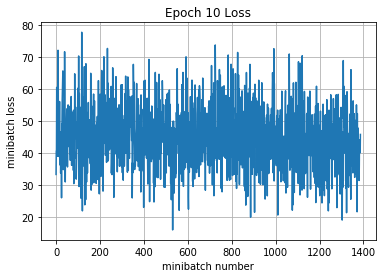

Iteration 13880: with minibatch training loss = 0.744 and accuracy of 0.77
Iteration 13881: with minibatch training loss = 0.949 and accuracy of 0.73
Iteration 13882: with minibatch training loss = 0.537 and accuracy of 0.86
Iteration 13883: with minibatch training loss = 0.576 and accuracy of 0.81
Iteration 13884: with minibatch training loss = 0.808 and accuracy of 0.75
Iteration 13885: with minibatch training loss = 1.01 and accuracy of 0.7
Iteration 13886: with minibatch training loss = 0.54 and accuracy of 0.84
Iteration 13887: with minibatch training loss = 0.8 and accuracy of 0.8
Iteration 13888: with minibatch training loss = 0.531 and accuracy of 0.84
Iteration 13889: with minibatch training loss = 0.69 and accuracy of 0.81
Iteration 13890: with minibatch training loss = 1.11 and accuracy of 0.7
Iteration 13891: with minibatch training loss = 0.816 and accuracy of 0.77
Iteration 13892: with minibatch training loss = 0.634 and accuracy of 0.8
Iteration 13893: with minibatch tra

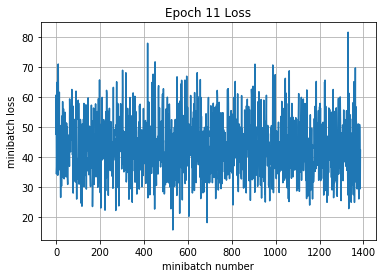

Iteration 15268: with minibatch training loss = 0.591 and accuracy of 0.83
Iteration 15269: with minibatch training loss = 0.577 and accuracy of 0.84
Iteration 15270: with minibatch training loss = 0.855 and accuracy of 0.73
Iteration 15271: with minibatch training loss = 0.496 and accuracy of 0.88
Iteration 15272: with minibatch training loss = 0.692 and accuracy of 0.8
Iteration 15273: with minibatch training loss = 0.629 and accuracy of 0.81
Iteration 15274: with minibatch training loss = 0.536 and accuracy of 0.83
Iteration 15275: with minibatch training loss = 0.572 and accuracy of 0.84
Iteration 15276: with minibatch training loss = 0.837 and accuracy of 0.73
Iteration 15277: with minibatch training loss = 0.501 and accuracy of 0.86
Iteration 15278: with minibatch training loss = 0.754 and accuracy of 0.77
Iteration 15279: with minibatch training loss = 0.875 and accuracy of 0.72
Iteration 15280: with minibatch training loss = 0.735 and accuracy of 0.77
Iteration 15281: with mini

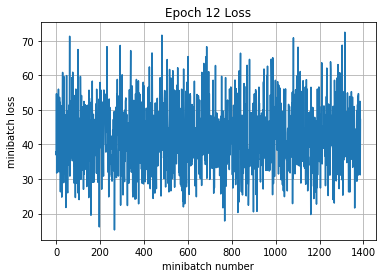

Iteration 16656: with minibatch training loss = 0.529 and accuracy of 0.84
Iteration 16657: with minibatch training loss = 0.837 and accuracy of 0.7
Iteration 16658: with minibatch training loss = 0.557 and accuracy of 0.84
Iteration 16659: with minibatch training loss = 0.592 and accuracy of 0.83
Iteration 16660: with minibatch training loss = 0.516 and accuracy of 0.88
Iteration 16661: with minibatch training loss = 0.655 and accuracy of 0.8
Iteration 16662: with minibatch training loss = 0.415 and accuracy of 0.88
Iteration 16663: with minibatch training loss = 0.525 and accuracy of 0.84
Iteration 16664: with minibatch training loss = 0.526 and accuracy of 0.84
Iteration 16665: with minibatch training loss = 0.689 and accuracy of 0.83
Iteration 16666: with minibatch training loss = 0.565 and accuracy of 0.83
Iteration 16667: with minibatch training loss = 0.693 and accuracy of 0.78
Iteration 16668: with minibatch training loss = 0.617 and accuracy of 0.81
Iteration 16669: with minib

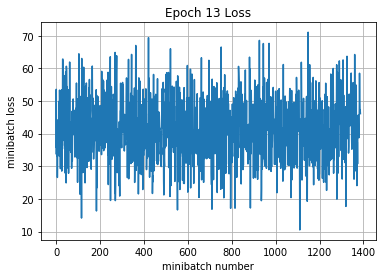

Iteration 18044: with minibatch training loss = 0.452 and accuracy of 0.86
Iteration 18045: with minibatch training loss = 0.676 and accuracy of 0.78
Iteration 18046: with minibatch training loss = 0.668 and accuracy of 0.78
Iteration 18047: with minibatch training loss = 0.689 and accuracy of 0.77
Iteration 18048: with minibatch training loss = 0.746 and accuracy of 0.8
Iteration 18049: with minibatch training loss = 0.954 and accuracy of 0.69
Iteration 18050: with minibatch training loss = 0.543 and accuracy of 0.84
Iteration 18051: with minibatch training loss = 0.603 and accuracy of 0.8
Iteration 18052: with minibatch training loss = 0.592 and accuracy of 0.83
Iteration 18053: with minibatch training loss = 0.626 and accuracy of 0.8
Iteration 18054: with minibatch training loss = 0.636 and accuracy of 0.81
Iteration 18055: with minibatch training loss = 0.652 and accuracy of 0.8
Iteration 18056: with minibatch training loss = 0.529 and accuracy of 0.83
Iteration 18057: with minibat

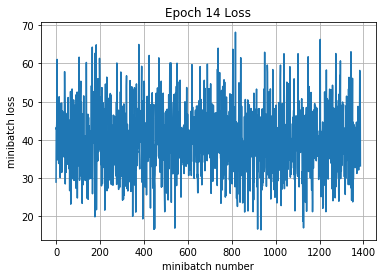

Iteration 19432: with minibatch training loss = 0.649 and accuracy of 0.78
Iteration 19433: with minibatch training loss = 0.489 and accuracy of 0.83
Iteration 19434: with minibatch training loss = 0.439 and accuracy of 0.84
Iteration 19435: with minibatch training loss = 0.543 and accuracy of 0.86
Iteration 19436: with minibatch training loss = 0.455 and accuracy of 0.88
Iteration 19437: with minibatch training loss = 0.884 and accuracy of 0.7
Iteration 19438: with minibatch training loss = 0.747 and accuracy of 0.78
Iteration 19439: with minibatch training loss = 0.363 and accuracy of 0.92
Iteration 19440: with minibatch training loss = 0.775 and accuracy of 0.75
Iteration 19441: with minibatch training loss = 0.435 and accuracy of 0.88
Iteration 19442: with minibatch training loss = 0.73 and accuracy of 0.77
Iteration 19443: with minibatch training loss = 0.821 and accuracy of 0.73
Iteration 19444: with minibatch training loss = 0.731 and accuracy of 0.73
Iteration 19445: with minib

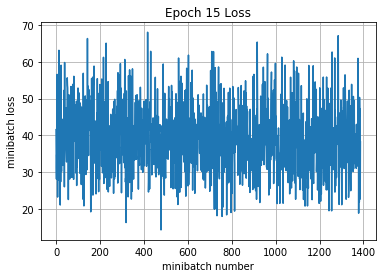

In [5]:
# Define hyperparameters:
num_epoch = 15
batch_size = 64




# Define model:
model = SENet(inp_w = 28, inp_h = 28, inp_d = 1)
model.fit(X_train, y_train_enc, num_epoch = num_epoch, batch_size = batch_size, weight_save_path = weight_save_path, plot_losses = True)

In [6]:
# Test model:
print(model.evaluate(X_test, y_test_enc))

Validation loss: 0.439825
Epoch 1, Overall loss = 0.335 and accuracy of 0.915
None
